In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [22]:
# ✅ Step 1: Load dataset
df = pd.read_csv("C:/Users/Dragon/Downloads/bank-full.csv", sep=';')

In [24]:
# ✅ Step 2: Clean data
df.replace('unknown', pd.NA, inplace=True)
df.dropna(inplace=True)

In [26]:
# ✅ Step 3: Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [28]:
# ✅ Step 4: Prepare features and target
X = df.drop('y', axis=1)
y = df['y']

In [30]:
# ✅ Step 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# ✅ Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [40]:
# ✅ Step 7: Define ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

In [42]:
# ✅ Step 8: Train models and collect accuracies
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print("="*50)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Model: Logistic Regression
Accuracy: 0.8266
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1207
           1       0.67      0.49      0.56       362

    accuracy                           0.83      1569
   macro avg       0.76      0.71      0.73      1569
weighted avg       0.81      0.83      0.82      1569

Model: Random Forest
Accuracy: 0.8528
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1207
           1       0.71      0.60      0.65       362

    accuracy                           0.85      1569
   macro avg       0.80      0.77      0.78      1569
weighted avg       0.85      0.85      0.85      1569

Model: SVM
Accuracy: 0.8305
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1207
           1       0.67      0.52      0.59       362

   

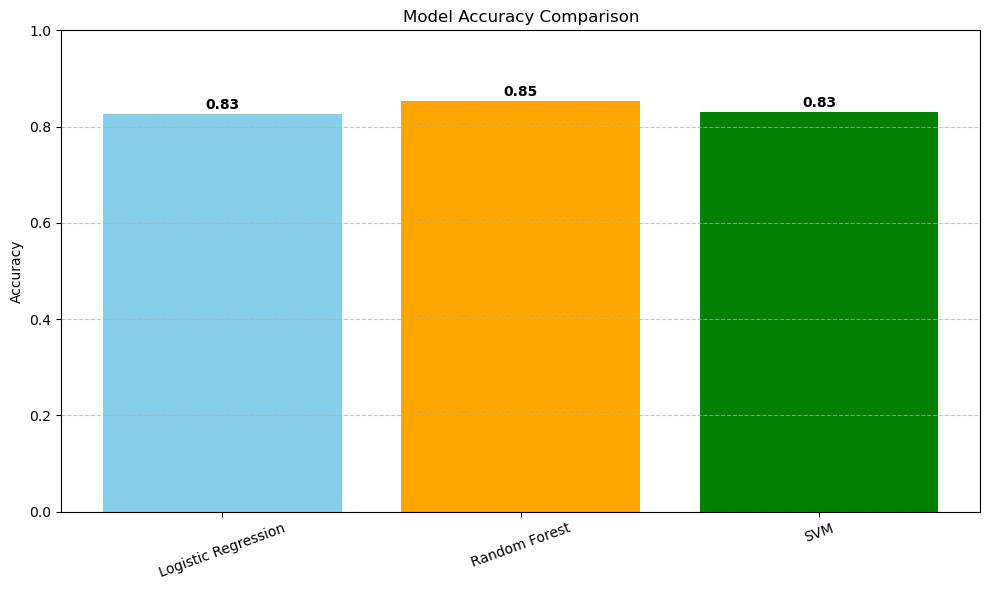

In [44]:
# ✅ Step 9: Plot model accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'orange', 'green', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10, fontweight='bold')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()